In [7]:
import pandas as pd
profiles = pd.read_pickle("data/profiles.pkl")

In [21]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

# Identificando o perfil de consumo dos otakus

*Usando um recorte aleatório de dados cedidos pela myanimelist.net.

## Overview dos perfis

Cerca de 57% das observações foram removidas por ausência de informações relevantes, mas ainda temos uma amostra de mais de 20 mil perfis de usuários!

Algumas das principais características deste público são:

### 66,5% são homens

In [9]:
# porcentagem de homens
profiles_amount = profiles.shape[0]
males_amount = (profiles["gender"] == "Male").sum()
males_percent = print("{:.1f}%".format(males_amount/profiles_amount *100))

66.5%


### A idade média é 29 anos

In [11]:
#idade media
average_age = print("{:.1f}".format(profiles["user_age"].mean()))

29.2


### O gênero mais popular é comédia

In [12]:
# Genero mais prevalente
anime_genres = [
    "Comedy", "Sports", "Drama", "School", "Shounen", "Music",
    "Romance", "Sci-Fi", "Adventure", "Mystery", "Fantasy", "Action",
    "Military", "Magic", "Supernatural", "Vampire", "Slice of Life",
    "Demons", "Historical", "Super Power", "Mecha", "Parody", "Samurai",
    "Seinen", "Police", "Psychological", "Josei", "Space", "Kids",
    "Shoujo Ai", "Ecchi", "Shoujo", "Horror", "Shounen Ai", "Cars",
    "Martial Arts", "Game", "Thriller", "Dementia", "Harem", "Hentai",
    "Yaoi", "Yuri"]
profiles[anime_genres].sum().idxmax()

'Comedy'

## Vamos nos aprofundar mais nos gêneros?

### Público alvo

Alguns gêneros de anime indicam o tipo de audiência para qual o anime é direcionado:

- **Shounen** para o público jovem e masculino;

- **Shoujo** para o público jovem e feminino;

- **Seinen** para o homens;

- **Josei** para o mulheres;

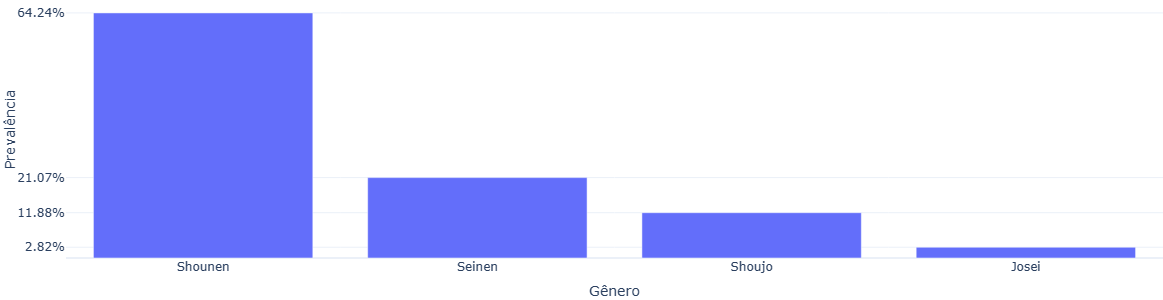

In [38]:
# 
target_genres = ["Shounen", "Shoujo", "Seinen", "Josei"]

temp = profiles[target_genres].sum().reset_index()
temp.columns = ("Gênero", "Prevalência")
temp["Prevalência"] = temp["Prevalência"]\
    .apply(lambda x: x/temp["Prevalência"].sum() *100)
temp.sort_values(by="Prevalência", inplace=True, ascending=False)

layout = go.Layout(yaxis=dict(tickformat=".2%"))
fig = px.bar(temp, *temp.columns, template="plotly_white")
fig.update_yaxes(
    tickvals=temp["Prevalência"], 
    ticktext=["{:.2f}%".format(x) for x in temp["Prevalência"]]
)
fig.update_layout(height=300, width=900, margin={"t":0, "b":0, "l":0, "r":0})
fig.show(config={"displayModeBar": False})